![Statistical Analytics](../Images/Statistical_Analytics.png)

---

**Statistical analysis serves as the backbone of HR analytics, empowering organizations to transform raw workforce data into actionable insights. By applying rigorous statistical methods, HR teams can move beyond intuition and base their decisions on quantifiable evidence. This approach not only sharpens talent management strategies but also uncovers hidden trends in employee behavior, performance, and retention.**

---

# <span style="background-color:#393be5; color:white; padding:10px;border-radius:15px; text-align:center;">OUTLINE</span>

- Importing Various Modules
- Loading Dataset
- Statistical Analysis
    - Perform ANOVA Test.
    - Visualizing the F_Score of ANOVA Test of Each Numerical features.
    - Clean table comparing.
    - Performing Chi-Square Test.
    - Visualizing the Chi-Square Statistic Values of Each Categorical Features.
    - Compairing Chi2_Statistic and P_value of Chi_Square Test.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">IMPORTING MODULES</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Set seaborn styling
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">DATASET</span>

In [2]:
employee_data = '../CSV/employee_attrition_cleaned.csv'
df = pd.read_csv(employee_data)

# Display the first 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,...,Excellent,Low,0,6,3,Best,4,3,1,2


In [4]:
rows, columns = df.shape
rows, columns

(1470, 31)

**Perform ANOVA Test**

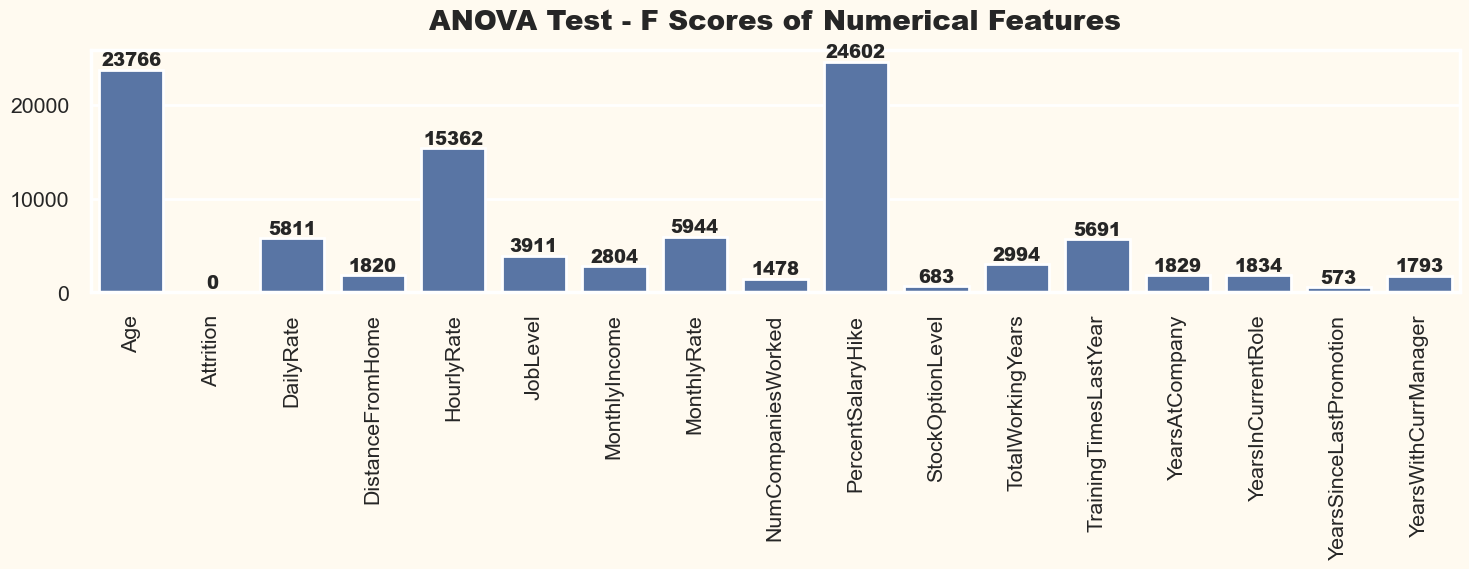

In [5]:
# Preprocess Attrition column
df["Attrition"] = df["Attrition"].replace({"No": 0, "Yes": 1})

# Identify numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Perform ANOVA Test
f_scores = {}
p_values = {}

for column in num_cols:
    f_stat, p_val = stats.f_oneway(df[column], df["Attrition"])
    f_scores[column] = f_stat
    p_values[column] = p_val

# Visualize F-Scores
plt.figure(figsize=(15, 6))
sns.barplot(x=list(f_scores.keys()), y=list(f_scores.values()))
plt.title("ANOVA Test - F Scores of Numerical Features", fontweight="black", size=20, pad=15)
plt.xticks(rotation=90)
for i, val in enumerate(f_scores.values()):
    plt.text(i, val, int(val), ha='center', va='bottom', fontweight='black', fontsize=13)
plt.tight_layout()
plt.show()


***Next:***
**Let’s create a clean table comparing:**
- F_Score

- P_Value

**This will help identify which features are statistically significant (typically where p < 0.05).**

In [6]:
# Ensure Attrition is numeric for analysis
df["Attrition"] = df["Attrition"].replace({"No": 0, "Yes": 1})

# Identify numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Perform ANOVA Test
f_scores = {}
p_values = {}

for column in num_cols:
    f_stat, p_val = stats.f_oneway(df[column], df["Attrition"])
    f_scores[column] = f_stat
    p_values[column] = p_val

# Prepare DataFrame to compare F_Score and P_value
anova_results = pd.DataFrame({
    "Features": list(f_scores.keys()),
    "F_Score": list(f_scores.values()),
    "P_value": [format(p, '.20f') for p in p_values.values()]
})

# Display the ANOVA results DataFrame
anova_results.sort_values(by="F_Score", ascending=False, inplace=True)
anova_results.reset_index(drop=True, inplace=True)
anova_results

,Features,F_Score,P_value
0,PercentSalaryHike,2.460251e+04,0.00000000000000000000
1,Age,2.376693e+04,0.00000000000000000000
2,HourlyRate,1.536212e+04,0.00000000000000000000
3,MonthlyRate,5.944089e+03,0.00000000000000000000
4,DailyRate,5.811797e+03,0.00000000000000000000
5,TrainingTimesLastYear,5.691402e+03,0.00000000000000000000
6,JobLevel,3.911332e+03,0.00000000000000000000
7,TotalWorkingYears,2.994906e+03,0.00000000000000000000
8,MonthlyIncome,2.804460e+03,0.00000000000000000000
9,YearsInCurrentRole,1.834262e+03,0.00000000000000000000


- Since p-values = 0.000..., these features have a strong association with attrition.

- Features with lower F-Scores (e.g., StockOptionLevel, YearsSinceLastPromotion) are less impactful.

---
***Next:***
**Proceeding to the Chi-Square Test for categorical features.**

**I'll calculate:**

- Chi2 statistics,

- P-values,

- Visualize the Chi2 scores.

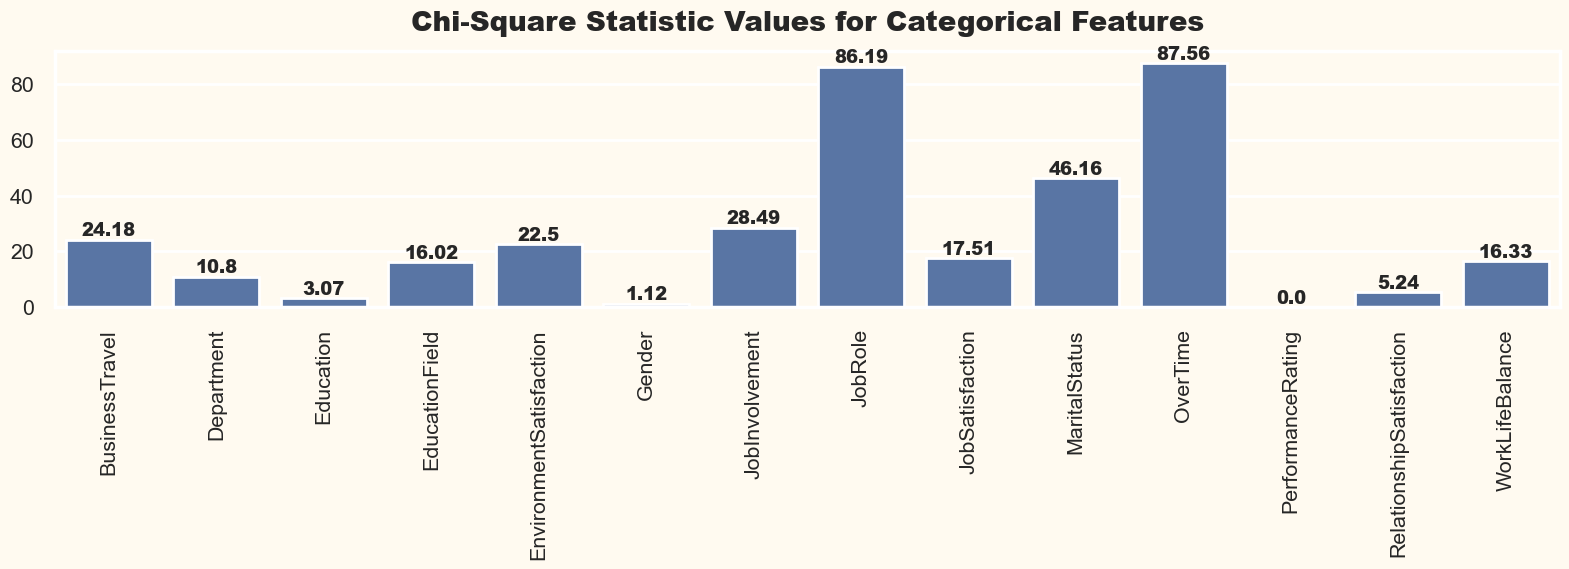

In [7]:
# Identify categorical columns (excluding Attrition)
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'Attrition' in cat_cols:
    cat_cols.remove('Attrition')

# Prepare dictionaries
chi2_statistic = {}
chi2_p_values = {}

# Perform Chi-Square Test for each categorical feature
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df["Attrition"])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2_stat
    chi2_p_values[col] = p_val

# Visualization of Chi2 Statistics
plt.figure(figsize=(16,6))
sns.barplot(x=list(chi2_statistic.keys()), y=list(chi2_statistic.values()))
plt.xticks(rotation=90)
plt.title("Chi-Square Statistic Values for Categorical Features", fontweight="black", size=20, pad=15)
for idx, val in enumerate(chi2_statistic.values()):
    plt.text(idx, val, round(val, 2), ha='center', va='bottom', fontweight="black", fontsize=13)
plt.tight_layout()
plt.show()

- Features like OverTime, JobRole, Department, and MaritalStatus show high Chi-Square values, indicating a strong association with attrition.

- Features like Gender, PerformanceRating, and Education show low Chi-Square values, meaning they have less influence on attrition.

---
**Final Step:
Let’s tabulate the Chi2 Statistic and P-Values for detailed comparison.**

In [8]:
# Create DataFrame for Chi-Square results
chi2_results = pd.DataFrame({
    "Features": list(chi2_statistic.keys()),
    "Chi2_Statistic": list(chi2_statistic.values()),
    "P_value": [format(p, '.20f') for p in chi2_p_values.values()]
})

# Sort by Chi2 Statistic
chi2_results.sort_values(by="Chi2_Statistic", ascending=False, inplace=True)
chi2_results.reset_index(drop=True, inplace=True)

# Display the Chi-Square results
chi2_results


,Features,Chi2_Statistic,P_value
0,OverTime,87.564294,0.00000000000000000001
1,JobRole,86.190254,0.00000000000000275248
2,MaritalStatus,46.163677,0.00000000009455511060
3,JobInvolvement,28.492021,0.00000286318063671342
4,BusinessTravel,24.182414,0.00000560861447644993
5,EnvironmentSatisfaction,22.503881,0.00005123468906289433
6,JobSatisfaction,17.505077,0.00055630045103875563
7,WorkLifeBalance,16.325097,0.00097256988453488225
8,EducationField,16.024674,0.00677398013902521298
9,Department,10.796007,0.00452560657447963373


**Interpretation:**

**Features with p-value < 0.05 show a statistically significant relationship with attrition.**

- Features like:

  - OverTime, JobRole, MaritalStatus, JobInvolvement are key drivers of attrition.

- Features like:

  - Gender, PerformanceRating, Education have no significant impact.

---


**Now we have:**

- A clear view of which numerical and categorical features influence attrition.

- Data-backed insights to focus on impactful areas.

---